In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import normalize
from scipy.special import expit as sigmoid
import sklearn.metrics as metrics

import seaborn as sns

In [2]:
csv_path = "/home/jens/masterRepo/test/ga_and_baseline/ga_f1_cost_performance_5.000000_5.000000.csv"
df = pd.read_csv(csv_path, dtype = {"objName":"category"})

df["min_cost_evals"] = df["min_cost_i"]*df["pop_size"]  
df.rename(columns={"n_ocs":"#h"},inplace=True)
df.head()

,objName,dpI,r,min_cost,min_cost_i,max_it,pop_size,#h,min_cost_evals
0,AngleTubes,0,0,0.017544,5,10,10,31,50
1,AngleTubes,0,0,0.017544,13,20,10,31,130
2,AngleTubes,0,0,0.017544,3,30,10,31,30
3,AngleTubes,0,0,0.000000,29,40,10,31,290
4,AngleTubes,0,0,0.000000,11,50,10,31,110


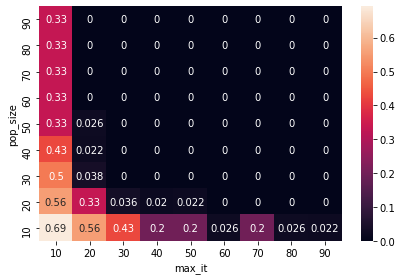

In [89]:
data = df.groupby(["max_it","pop_size"]).max().reset_index()
hm_data = data.pivot(index='pop_size', columns='max_it', values='min_cost')
hm_data = hm_data.reindex(index=hm_data.index[::-1])

sns.heatmap(hm_data,annot=True)
plt.tight_layout()
plt.savefig('report/conv_heatmap_min_cost.eps', format='eps')

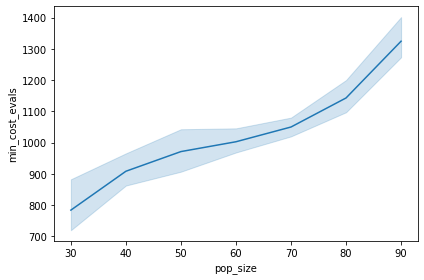

In [121]:
data = df[(df["max_it"]>20) & (df["pop_size"]>20)].groupby(["max_it","pop_size"]).max().reset_index()
hm_data = data.pivot(index='pop_size', columns='max_it', values='min_cost_evals')
hm_data = hm_data.reindex(index=hm_data.index[::-1])

sns.lineplot(data=data,x="pop_size",y="min_cost_evals")
plt.tight_layout()
plt.savefig('report/conv_min_cost_evals.pdf', format='pdf')

In [97]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(df.corrwith(df["#h"]))

dpI              -0.256
r                 0.000
min_cost          0.136
min_cost_i        0.733
max_it            0.000
pop_size          0.000
#h                1.000
min_cost_evals    0.840
dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

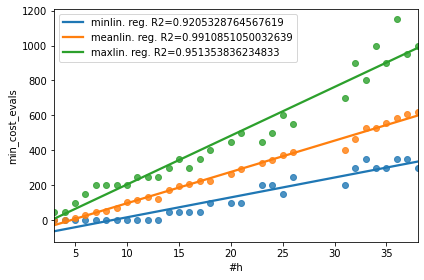

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

data = df[(df["max_it"]>30) & (df["pop_size"]==50)]
min_data = data.groupby("#h").min().reset_index()
mean_data = data.groupby("#h").mean().reset_index()
max_data = data.groupby("#h").max().reset_index()

score = []
coef = []
intercept = []
for data in [min_data,mean_data,max_data]:
    X = data["#h"].to_numpy().reshape(-1, 1)
    y = data["min_cost_evals"].to_numpy().reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    score.append(reg.score(X, y))
    coef.append(reg.coef_)
    intercept.append(reg.intercept_)
print("score",score)
print("coef_",coef)
print("intercept_",intercept)

fig, ax = plt.subplots()

sns.regplot(data=min_data,x="#h",y="min_cost_evals",fit_reg=True,ci=None,ax=ax)
sns.regplot(data=mean_data,x="#h",y="min_cost_evals",fit_reg=True,ci=None,ax=ax)
sns.regplot(data=max_data,x="#h",y="min_cost_evals",fit_reg=True,ci=None,ax=ax)
ax.legend([t+"lin. reg. R2="+str(s) for t,s in zip(["min","mean","max"],score)])
plt.tight_layout()
plt.savefig('report/conv_scatter_eval_ocs.eps', format='eps')

score 0.8801445079908625
coef_ [[9.55188219]]
intercept_ [-84.62491052]
score 0.9927346641491194
coef_ [[21.49977755]]
intercept_ [-99.46655124]
score 0.9582544679751617
coef_ [[35.54280827]]
intercept_ [-58.71524065]
